# Importing Libraries

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img ,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [16]:
pip --version


pip 21.2.4 from C:\Users\shadow\anaconda3\lib\site-packages\pip (python 3.9)Note: you may need to restart the kernel to use updated packages.




In [21]:
picture_size = 48
folder_path = "data/"

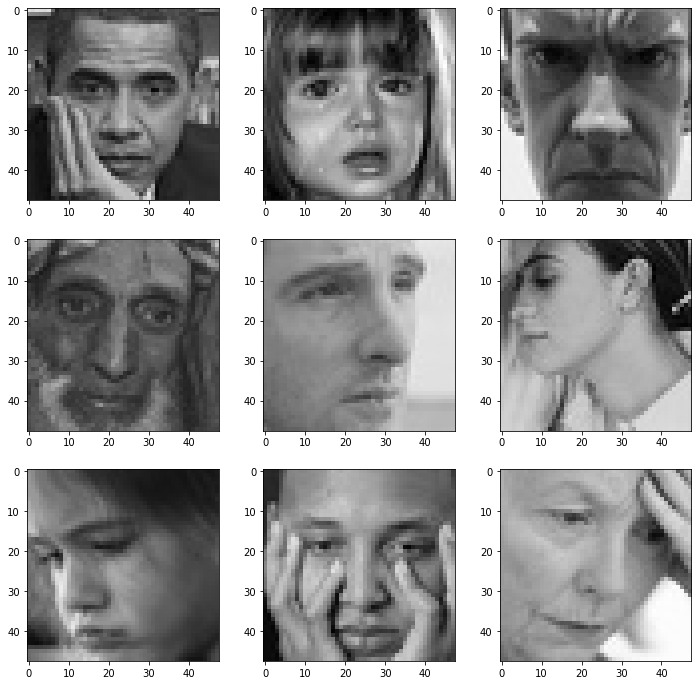

In [23]:
expression = 'stress'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [25]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"test",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 9795 images belonging to 2 classes.
Found 2480 images belonging to 2 classes.


# Model Building

In [45]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 2

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

# Fitting the Model with Training and Validation Data 

In [46]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [47]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48
76/76 [==============================] - 261s 3s/step - loss: 0.7920 - accuracy: 0.5486 - val_loss: 1.8900 - val_accuracy: 0.5210 - lr: 0.0010
Epoch 2/48
76/76 [==============================] - 239s 3s/step - loss: 0.7113 - accuracy: 0.5925 - val_loss: 0.6813 - val_accuracy: 0.5748 - lr: 0.0010
Epoch 3/48
76/76 [==============================] - 266s 4s/step - loss: 0.6728 - accuracy: 0.6156 - val_loss: 0.6846 - val_accuracy: 0.5991 - lr: 0.0010
Epoch 4/48
76/76 [==============================] - 272s 4s/step - loss: 0.6406 - accuracy: 0.6521 - val_loss: 0.6521 - val_accuracy: 0.6299 - lr: 0.0010
Epoch 5/48
76/76 [==============================] - 263s 3s/step - loss: 0.6184 - accuracy: 0.6690 - val_loss: 0.6218 - val_accuracy: 0.6649 - lr: 0.0010
Epoch 6/48
76/76 [==============================] - 255s 3s/step - loss: 0.5919 - accuracy: 0.6907 - val_loss: 0.7571 - val_accuracy: 0.6077 - lr: 0.0010
Epoch 7/48
76/76 [==============================] - 323s 4s/step - loss: 0.5

# Plotting Accuracy & Loss

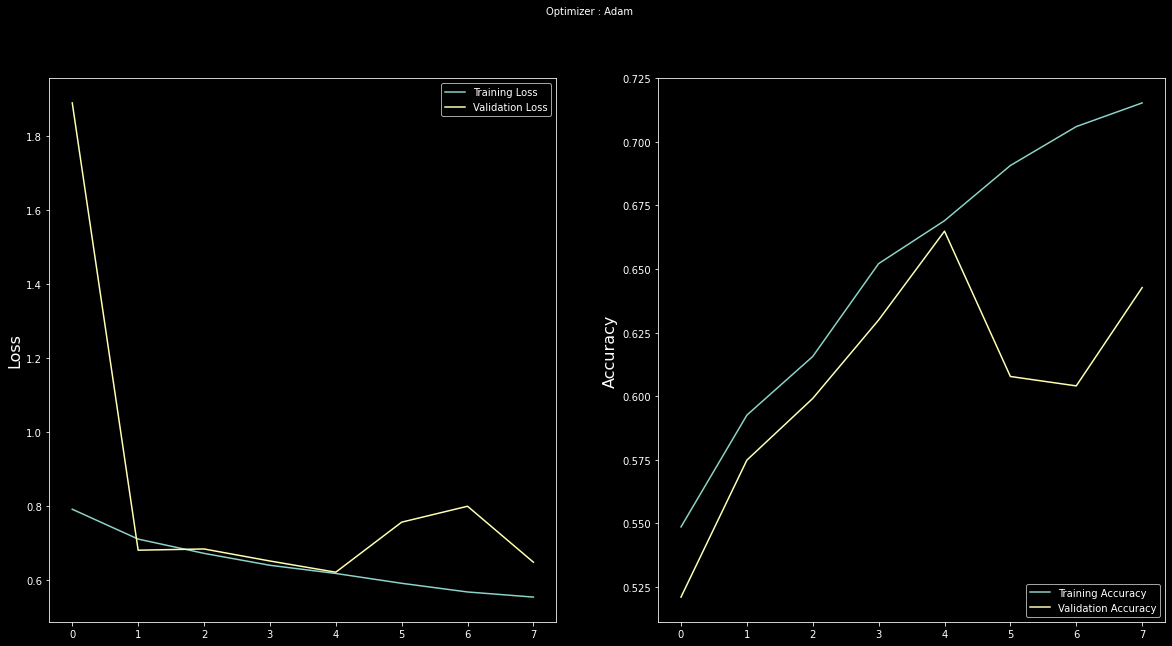

In [49]:
plt.style.use('dark_background')
# history = model.fit()
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [52]:
# save model structure in jason file
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
model.save_weights('emotion_model.h5')

In [ ]:
# import tensorflow as tf
# from sklearn.metrics import classification_report

# # Load the h5 model
# model = tf.keras.models.load_model('model.h5')

# # Prepare the data for testing
# test_data = ...  # Load your test data here
# test_labels = ...  # Load your test labels here

# # Make predictions on the test data
# predictions = model.predict(test_data)
# predicted_labels = tf.argmax(predictions, axis=1)

# # Generate the classification report
# target_names = ...  # A list of target class names
# print(classification_report(test_labels, predicted_labels, target_names=target_names))
